In [1]:
import os
import ast
import statistics
import pandas as pd
import numpy as np
from scipy.stats import ranksums

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import matplotlib.colors as mcolors

rcParams['figure.dpi'] = 500
rcParams['savefig.dpi'] = 500
rcParams['font.family'] = 'Serif'
rcParams['font.size'] = 18
rcParams['axes.labelsize'] = 18
rcParams['axes.titlesize'] = 18
rcParams['xtick.labelsize'] = 18
rcParams['ytick.labelsize'] = 18
rcParams['legend.fontsize'] = 18
rcParams['figure.titlesize'] = 18

In [3]:
mapping_df1 = pd.read_csv('google_categories_mapping.csv')
mapping_df2 = pd.read_excel('places_summary.xlsx')
mapping_df1 = mapping_df1.dropna()
mapping_df2 = mapping_df2.dropna()

google_to_naics3 = dict(zip(mapping_df1['category'], mapping_df1['3-digit NAICS Title']))
naics3_to_naics2 = dict(zip(mapping_df1['3-digit NAICS Title'], mapping_df1['2-digit NAICS Title']))
naics3_to_categories = dict(zip(mapping_df2['3-digit NAICS Title'], mapping_df2['Categories']))

### Mapping categories

In [5]:
def replace_naics(lst, dict_map):
    """Replace the naics codes in the list with the values in the dictionary"""
    return [dict_map.get(item, item) for item in lst]

def replace_category(lst, dict_map):
    """Replace the business sites with categories in the list"""
    values = list()
    for item in lst:
        if item in dict_map:
            values.append(dict_map[item])
        values = [x for x in values if x is not None]

    values = [x for x in values if x is not None]
    l1 = len(set(values))
    l2 = len(values)
    if l1 == l2 and l1 != 0:
        return values[0]
    elif l1 > 1 and l1 != l2:
        return statistics.mode(values)
    else:
        return None

In [6]:
df = pd.read_csv('all_pois_categories.csv')
print(len(df))
df = df.dropna(subset=['category'])
print(len(df))
df['3-digit-naics'] = df['category'].apply(lambda x: replace_naics(ast.literal_eval(x), google_to_naics3))
df['2-digit-naics'] = df['3-digit-naics'].apply(lambda x: replace_naics(x, naics3_to_naics2))
df['2-digit-naics'] = df['2-digit-naics'].apply(lambda x: x[0] if len(set(x)) == len(x) else statistics.mode(x))
df['categories'] = df['3-digit-naics'].apply(lambda x: replace_category(x, naics3_to_categories))
df.head(5)

4988460
4967343


,name,gmap_id,category,3-digit-naics,2-digit-naics,categories
0,Purple Peanut,0x8862134e67ff5c87:0x38b5e2ae99cd1fcf,['Boutique'],[Clothing and Clothing Accessories Stores ],Retail Trade,Retail Trade
1,Posh Mommy & Baby Too!,0x886268e8fdc4fd2f:0x746533eb9aa4d4df,"['Baby store', ""Children's furniture store""]","[Clothing and Clothing Accessories Stores , Ch...",Retail Trade,Retail Trade
2,Soccer Shots North Alabama,0x8862693a967c0ecb:0xb84b19fa307337b0,"['Soccer club', 'Service establishment']","[Amusement, Gambling, and Recreation Industrie...","Arts, Entertainment, and Recreation",Recreation
3,Perdido Pass Jetty,0x889a07c7ba3993d5:0xbffff446052a43ed,['Fishing pier'],"[Amusement, Gambling, and Recreation Industries]","Arts, Entertainment, and Recreation",Recreation
4,Tri-Rx Pharmaceuticals,0x8862151721b911fd:0xef80131fdd2f539b,['Corporate office'],[Management of Companies and Enterprises],Management of Companies and Enterprises,None


### POI distribution

In [7]:
df1 = pd.read_pickle('pois_parking_with_socioinfo.pkl')
df1.head(5)

,gmap_id,total_parking_reviews,avg_parking_sentiment,avg_parking_rating,name,address,description,latitude,longitude,category,...,Categories,sum_comment,weight,weight_st,Population_Density,Median_income,Black_Non_Hispanic_R,Rural_Population_R,Household_Below_Poverty_R,Urbanized_Areas_Population_R
0,0x8888e12bf245f0cd:0x69ddc2584ccc28b6,3,0.666667,4.666667,Publix Super Market at Allison - Bonnett Plaza,Publix Super Market at Allison - Bonnett Plaza...,Supermarket chain with a wide selection of gro...,33.453196,-86.978265,"['Supermarket', 'Bakery', 'Beer store', 'Flori...",...,Retail Trade,15,0.2,0.133333,1274.34605,60912.0,38.279302,0.0,12.861736,100.0
1,0x8888e1108861e741:0x9ada11933661046d,1,-1.000000,5.000000,Supercuts,"Supercuts, 3014 Allison-Bonnett Memorial Dr, H...",NaN,33.453027,-86.977745,"['Hair salon', 'Barber shop', 'Beauty salon', ...",...,Personal Service,15,0.066667,-0.066667,1274.34605,60912.0,38.279302,0.0,12.861736,100.0
2,0x8888e12b6d38c371:0x61fc04a38ddc2a76,3,0.333333,3.000000,Sonic Drive-In,"Sonic Drive-In, 3040 Allison Bonnett Mem Dr, H...",Fast-food burger & fries joint with an old-sch...,33.451191,-86.980804,"['Fast food restaurant', 'Chicken restaurant',...",...,Restaurant,15,0.2,0.066667,1274.34605,60912.0,38.279302,0.0,12.861736,100.0
3,0x8888e12b8dee8009:0xce0fd5e13f972f7d,3,-0.333333,1.000000,Burger King,"Burger King, 3016 Allison-Bonnett Memorial Dr,...",Well-known fast-food chain serving grilled bur...,33.451903,-86.978437,"['Restaurant', 'Fast food restaurant']",...,Restaurant,15,0.2,-0.066667,1274.34605,60912.0,38.279302,0.0,12.861736,100.0
4,0x8888e12eaab62b01:0xd5728ab8966c1f9d,2,1.000000,4.500000,AutoZone Auto Parts,"AutoZone Auto Parts, 3010 Allison-Bonnett Memo...",NaN,33.452222,-86.977421,"['Auto parts store', 'Car accessories store', ...",...,Retail Trade,15,0.133333,0.133333,1274.34605,60912.0,38.279302,0.0,12.861736,100.0


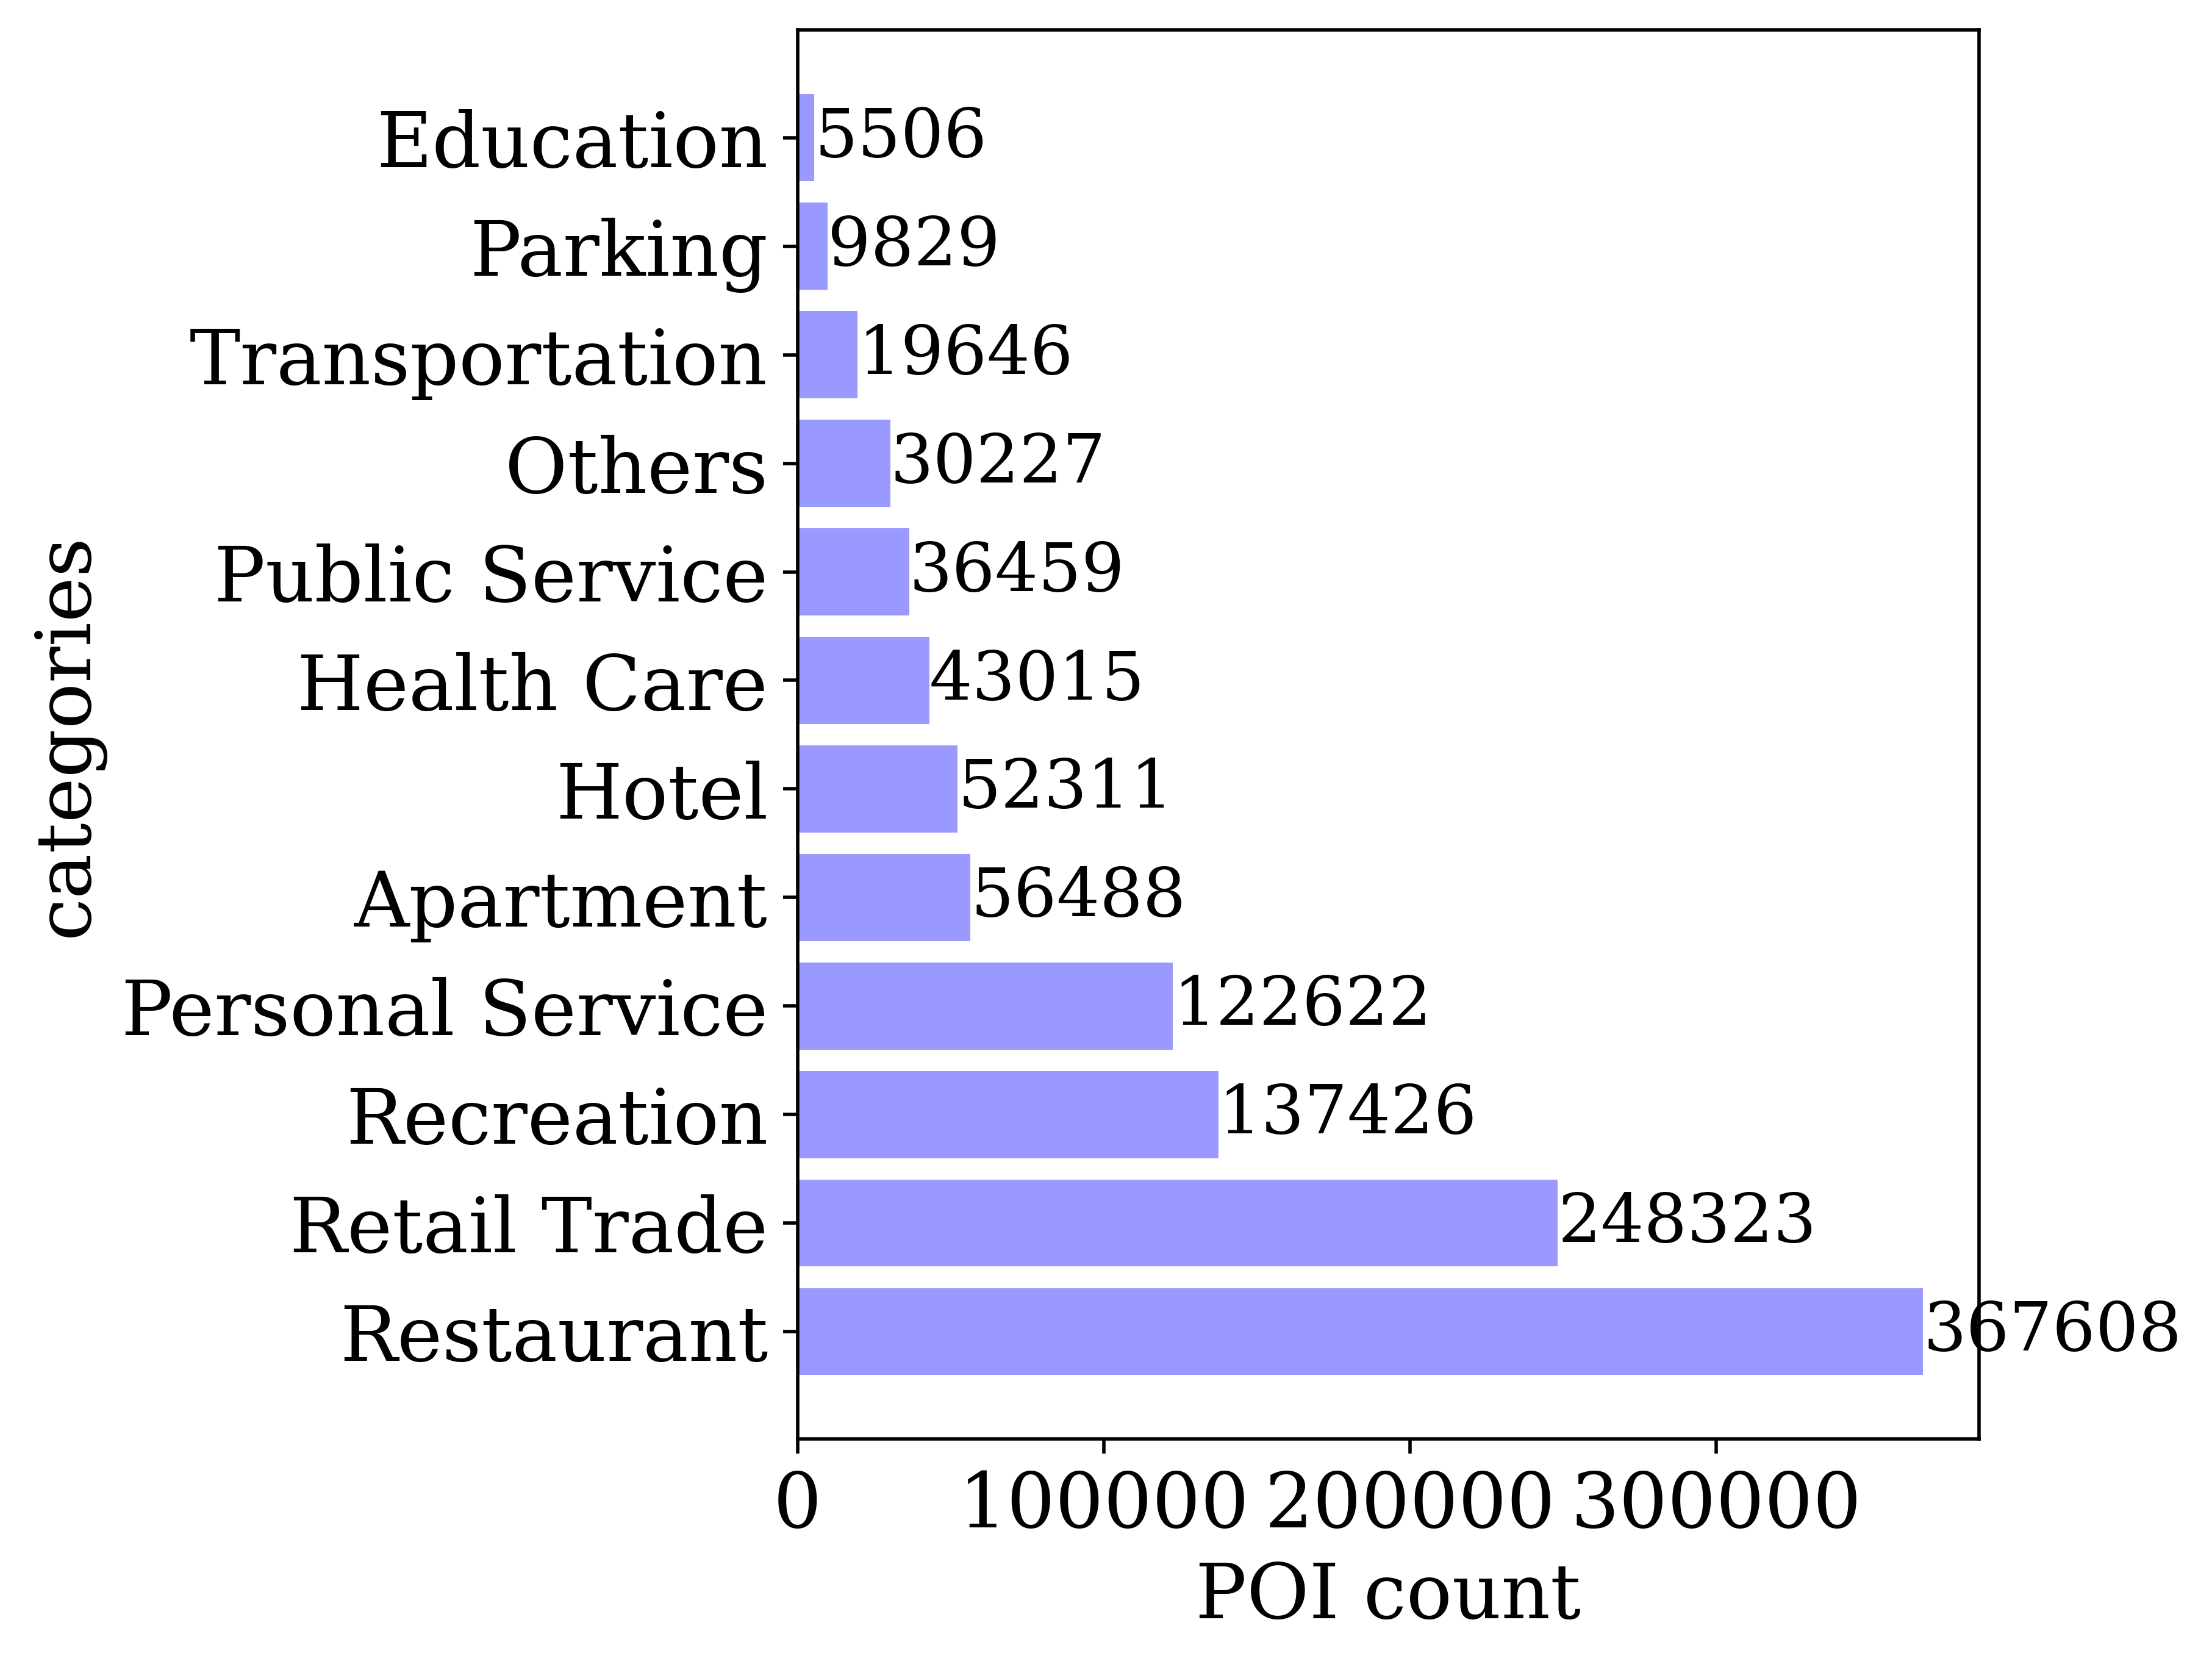

In [8]:
plt.figure(figsize=(5, 6))

value_counts = df1['Categories'].value_counts()
plt.barh(value_counts.index, value_counts.values, color='blue', alpha=0.4)

for i, (index, value) in enumerate(value_counts.items()):
    plt.text(value, i, str(value), ha='left', va='center', fontsize=16)

plt.xlabel('POI count')
plt.ylabel('categories')
plt.show()

In [9]:
files = os.listdir('parking-pos-meta')
files = [file for file in files if file.endswith('.csv')]
files = sorted(files)

pos_df = pd.DataFrame()

for file in files:
    filepath = os.path.join('parking-pos-meta', file)
    pos_data = pd.read_csv(filepath)
    pos_df = pd.concat([pos_df, pos_data])

pos_df = pos_df[['gmap_id', 'num_of_reviews']]
pos_df.head(5)

/var/folders/cw/l2jwfcqs4yl3k4j6btbtvjtm0000gr/T/ipykernel_47208/1297425357.py:9: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  pos_data = pd.read_csv(filepath)


,gmap_id,num_of_reviews
0,0x889bb2893c298efb:0xd3b07fae310c90b8,18
1,0x888cf278eb212263:0x18291d173388a0f6,17
2,0x889a4df246af1a87:0x5b8a17cf66b5f552,5
3,0x8889188a9e467ccb:0xf6024cf58888af4e,7
4,0x888919c2d484c0d5:0xe0f0016ed0a8ea0f,5


In [10]:
data1 = df1[['gmap_id', 'total_parking_reviews', 'Categories']]
data1 = pd.merge(data1, pos_df, on='gmap_id', how='left')
data1

,gmap_id,total_parking_reviews,Categories,num_of_reviews
0,0x8888e12bf245f0cd:0x69ddc2584ccc28b6,3,Retail Trade,583
1,0x8888e1108861e741:0x9ada11933661046d,1,Personal Service,115
2,0x8888e12b6d38c371:0x61fc04a38ddc2a76,3,Restaurant,817
3,0x8888e12b8dee8009:0xce0fd5e13f972f7d,3,Restaurant,328
4,0x8888e12eaab62b01:0xd5728ab8966c1f9d,2,Retail Trade,328
...,...,...,...,...
1131243,0x4cb43f5d455007ed:0x9d1b64755eb4569b,1,Others,1
1131244,0x549060bc195a2405:0xae0fbfd18e9163f9,3,Others,28
1131245,0x54904996405797f1:0x28033b93aa4c8a92,1,Others,13
1131246,0x89a95eea659c6663:0x8056f4e96468e1c0,2,Others,78


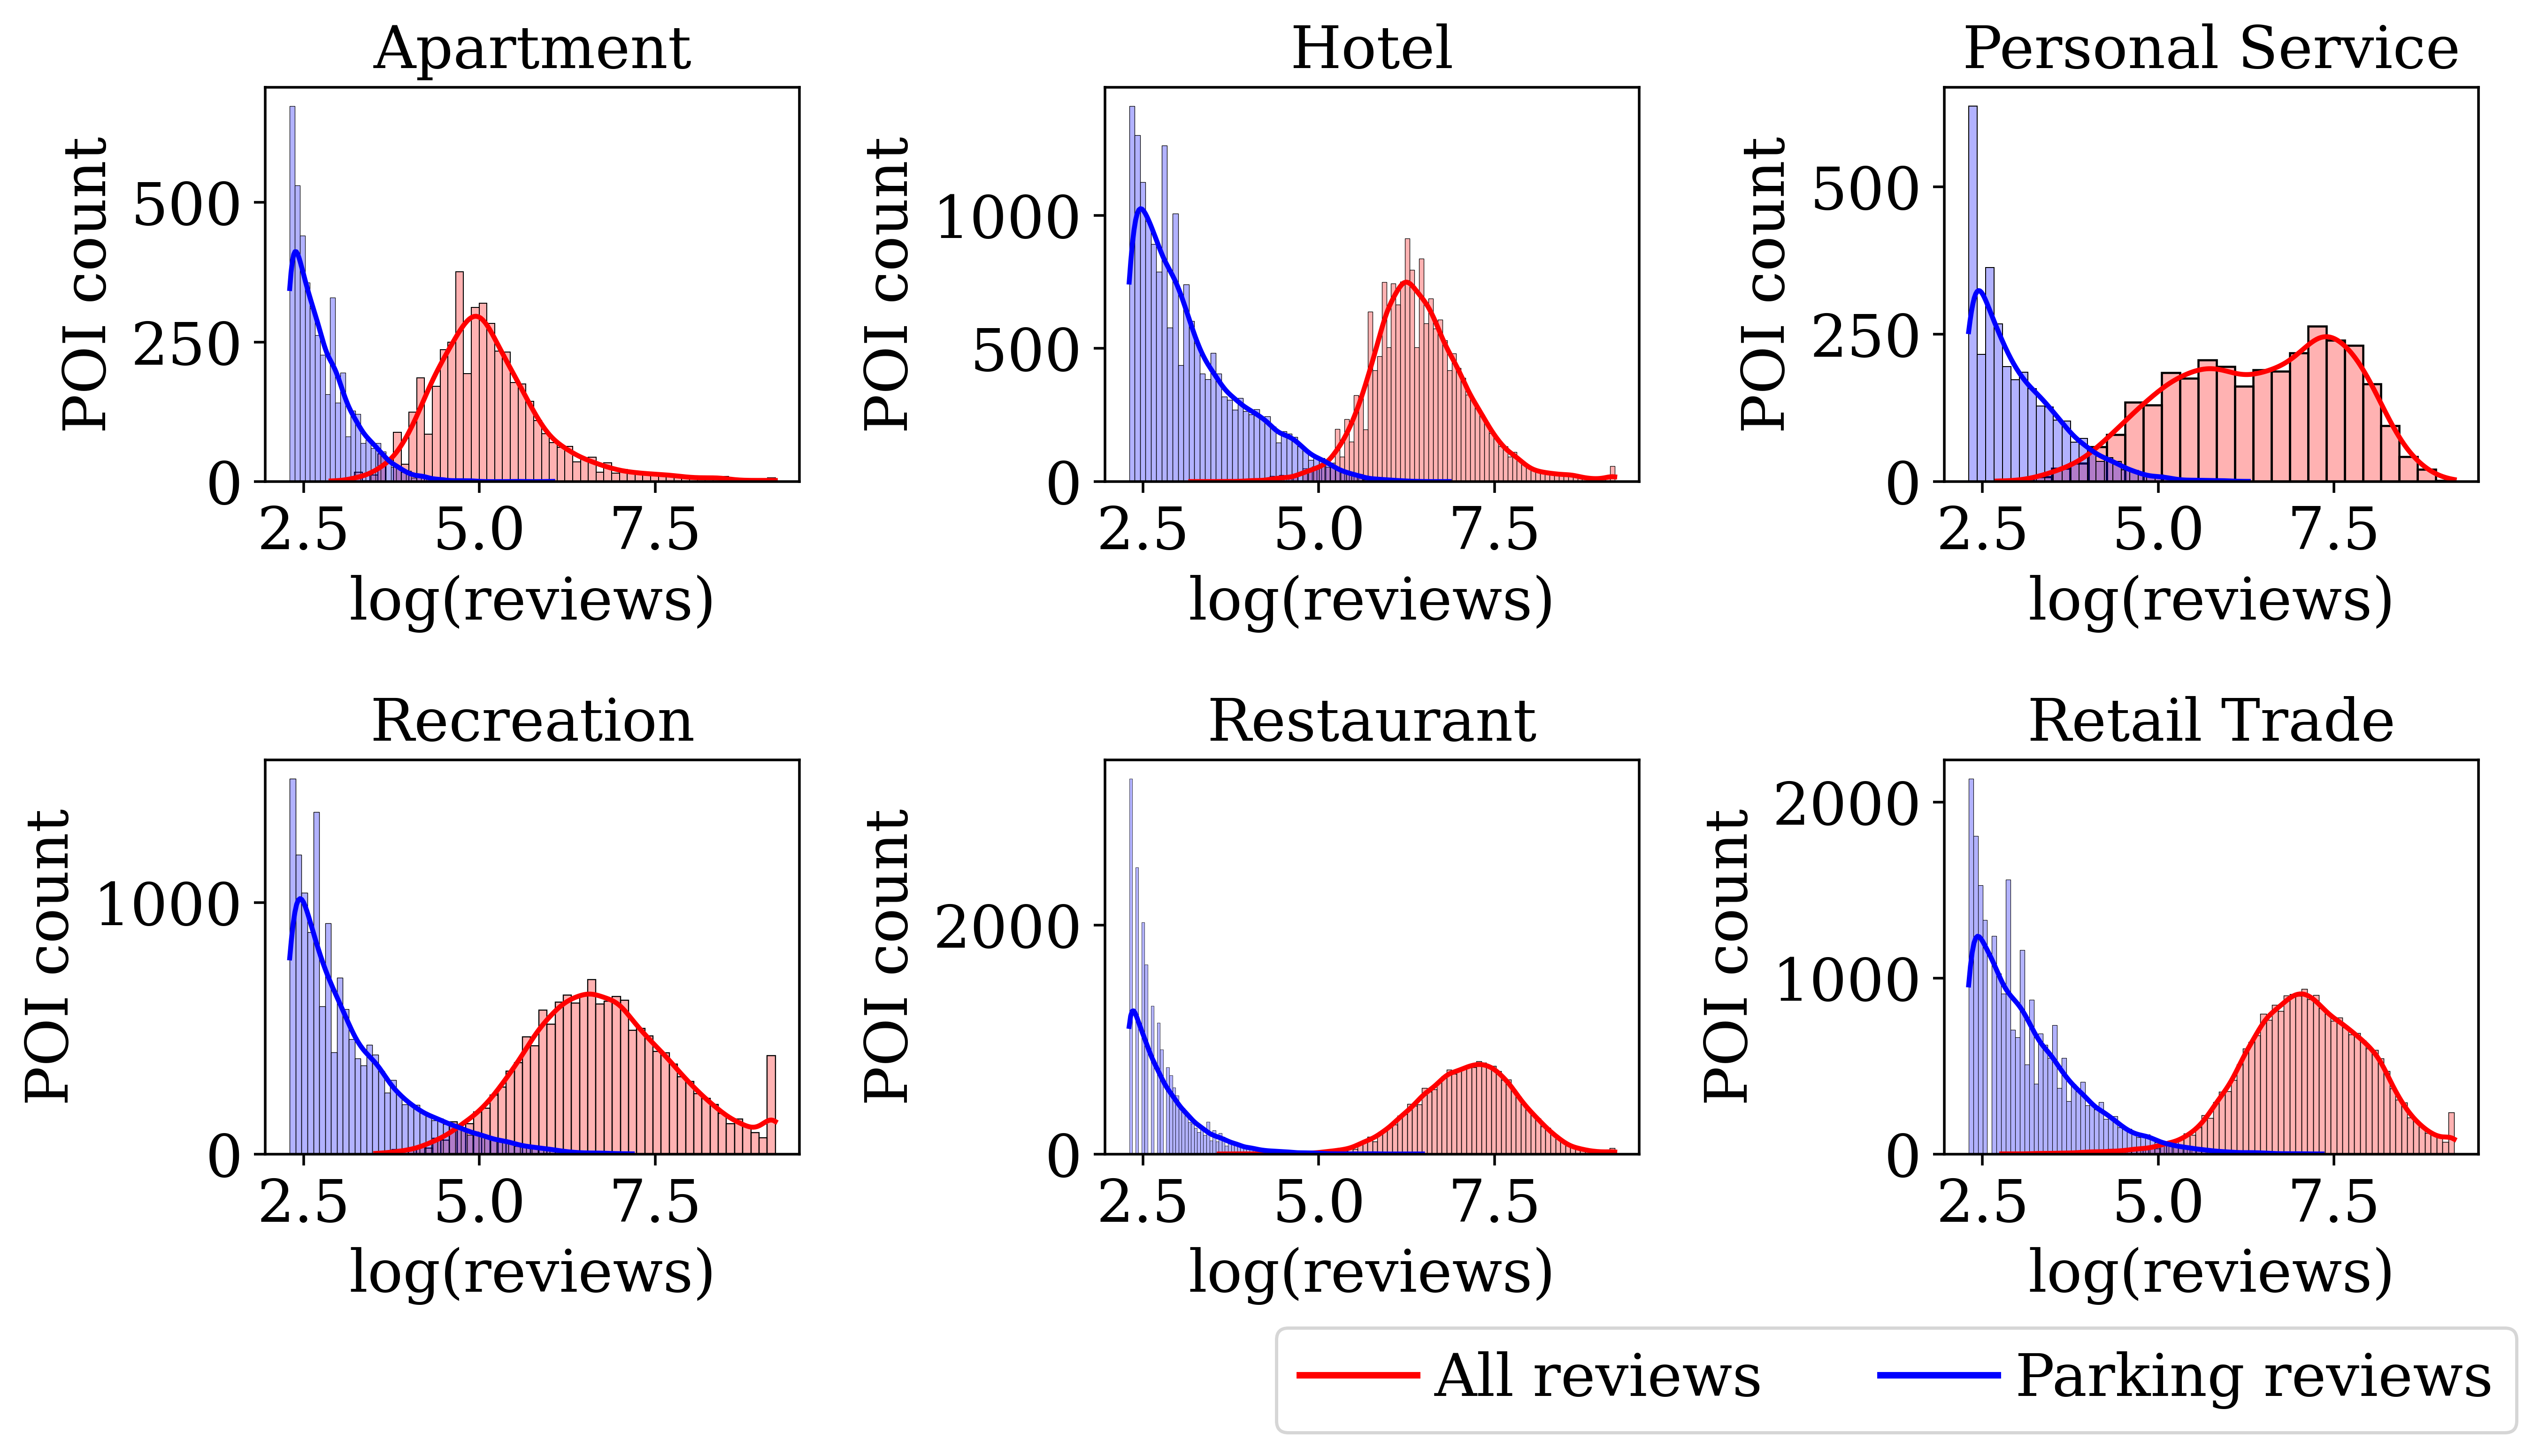

In [11]:
categories = ['Apartment', 'Hotel', 'Personal Service', 'Recreation', 'Restaurant', 'Retail Trade']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(11, 6))
for i, category in enumerate(categories):
    ax = axs[i // 3, i % 3]
    cat_df = data1[data1['Categories'] == category]
    cat_df = cat_df[cat_df['total_parking_reviews']>=10]
    cat_df['num_of_reviews'] = cat_df['num_of_reviews'].astype(float)
    cat_df['total_parking_reviews'] = cat_df['total_parking_reviews'].astype(float)
    cat_df['log_num_of_reviews'] = np.log(cat_df['num_of_reviews'])
    cat_df['log_total_parking_reviews'] = np.log(cat_df['total_parking_reviews'])
    sns.histplot(data=cat_df, x='log_num_of_reviews', kde=True, color='red', alpha=0.3, ax=ax)
    sns.histplot(data=cat_df, x='log_total_parking_reviews', kde=True, color='blue', alpha=0.3, ax=ax)
    ax.set_title(f'{category}')
    ax.set_xlabel('log(reviews)')
    ax.set_ylabel('POI count')

# Create custom legend
blue_line = plt.Line2D([0, 1], [0, 0], color='red', linestyle='-', linewidth=2)
red_line = plt.Line2D([0, 1], [0, 0], color='blue', linestyle='-', linewidth=2)
legend_elements = [blue_line, red_line]
legend_labels = ['All reviews', 'Parking reviews']
custom_legend = fig.legend(legend_elements, legend_labels, loc='lower center', bbox_to_anchor=(0.75, -0.05), 
                           ncol=2, handlelength=2, handletextpad=0.3, borderaxespad=0.1)

plt.tight_layout()
plt.show()

### POI Sentiment Distribution & Wilcoxon Test

In [12]:
read_dir = "parking-places-metrics"
files = os.listdir(read_dir)
files = [file for file in files if file.endswith('.csv')]
files = sorted(files)

dfs = list()

for file in files:
    filepath = os.path.join(read_dir, file)
    state_df = pd.read_csv(filepath)
    state_df['3-digit-naics'] = state_df['category'].apply(lambda x: replace_naics(ast.literal_eval(x), google_to_naics3))
    state_df['2-digit-naics'] = state_df['3-digit-naics'].apply(lambda x: replace_naics(x, naics3_to_naics2))
    state_df['2-digit-naics'] = state_df['2-digit-naics'].apply(lambda x: x[0] if len(set(x)) == len(x) else statistics.mode(x))
    state_df['categories'] = state_df['3-digit-naics'].apply(lambda x: replace_category(x, naics3_to_categories))
    filtered_df = state_df[state_df['total_parking_reviews']>=10]
    print(filepath, len(state_df), len(filtered_df))
    filtered_df = filtered_df[filtered_df['categories'].notna()]
    dfs.append(filtered_df)

df = pd.concat(dfs)
df.head(5)

parking-places-metrics/filtered_review-Alabama_classification-results.csv 13786 803
parking-places-metrics/filtered_review-Alaska_classification-results.csv 2203 95
parking-places-metrics/filtered_review-Arizona_classification-results.csv 26367 2471
parking-places-metrics/filtered_review-Arkansas_classification-results.csv 8314 451
parking-places-metrics/filtered_review-California_classification-results.csv 151337 15759
parking-places-metrics/filtered_review-Colorado_classification-results.csv 27386 2577
parking-places-metrics/filtered_review-Connecticut_classification-results.csv 12218 728
parking-places-metrics/filtered_review-Delaware_classification-results.csv 3446 213
parking-places-metrics/filtered_review-District_of_Columbia_classification-results.csv 3337 343
parking-places-metrics/filtered_review-Florida_classification-results.csv 90867 9421
parking-places-metrics/filtered_review-Georgia_classification-results.csv 37160 3288
parking-places-metrics/filtered_review-Hawaii_classi

,gmap_id,total_parking_reviews,avg_parking_sentiment,avg_parking_rating,name,address,description,latitude,longitude,category,...,price,hours,MISC,state,relative_results,url,naics_code,3-digit-naics,2-digit-naics,categories
4,0x88891c67abfc3b4f:0xedf6fd3089c4b08d,27,-0.111111,2.814815,Pilot Travel Center,"Pilot Travel Center, 901 Bankhead Hwy W, Birmi...",NaN,33.529436,-86.851917,"['Truck stop', 'Convenience store', 'Gas stati...",...,NaN,"[['Wednesday', 'Open 24 hours'], ['Thursday', ...","{'Service options': ['In-store shopping', 'Del...",NaN,"['0x8888e0f2780e89e5:0xc62e73137ce10ad2', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,484.0,"[Truck Transportation, Food and Beverage Store...",Retail Trade,Retail Trade
39,0x88898775d0cb43a9:0x336191c4ccc007c9,18,0.666667,4.833333,Alabama Rest Area,"Alabama Rest Area, I-59, Steele, AL 35987",NaN,33.873339,-86.271717,['Rest stop'],...,NaN,"[['Friday', 'Open 24 hours'], ['Saturday', 'Op...",{'Accessibility': ['Wheelchair accessible entr...,NaN,"['0x888986dd38f66e71:0x9fe87e6bd41f113a', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,486.0,[Pipeline Transportation],Transportation and Warehousing,Transportation
65,0x88628af93498eafd:0x6b9a94bdc46c1f25,16,0.625000,4.571429,Quality Inn Athens I-65 / Huntsville Area West,Quality Inn Athens I-65 / Huntsville Area West...,"Straightforward roadside lodging with a pool, ...",34.783835,-86.937606,['Hotel'],...,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/place//data=!4m2!3...,721.0,[Accommodation],Accommodation and Food Services,Hotel
68,0x888c96224c1dd7c5:0x826b8a63582ce170,113,0.557522,3.973451,Cusseta Travel Plaza,"Cusseta Travel Plaza, 5495 Co Rd 388, Cusseta,...",NaN,32.744796,-85.279159,['Truck stop'],...,$$,"[['Wednesday', 'Open 24 hours'], ['Thursday', ...","{'Service options': ['In-store shopping', 'Del...",NaN,"['0x888cb5ab9e053415:0x8018ccc7799bb020', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,484.0,[Truck Transportation],Transportation and Warehousing,Transportation
112,0x889a2c63313f5f2f:0xfeacb3d4e53c4f87,52,-0.096154,4.288462,Public Beach,"Public Beach, 1501 Bienville Blvd, Dauphin Isl...",Tranquil gulf-front standby with a boardwalk t...,30.249385,-88.127515,['Beach'],...,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/place/1501+Bienvil...,713.0,"[Amusement, Gambling, and Recreation Industries]","Arts, Entertainment, and Recreation",Recreation


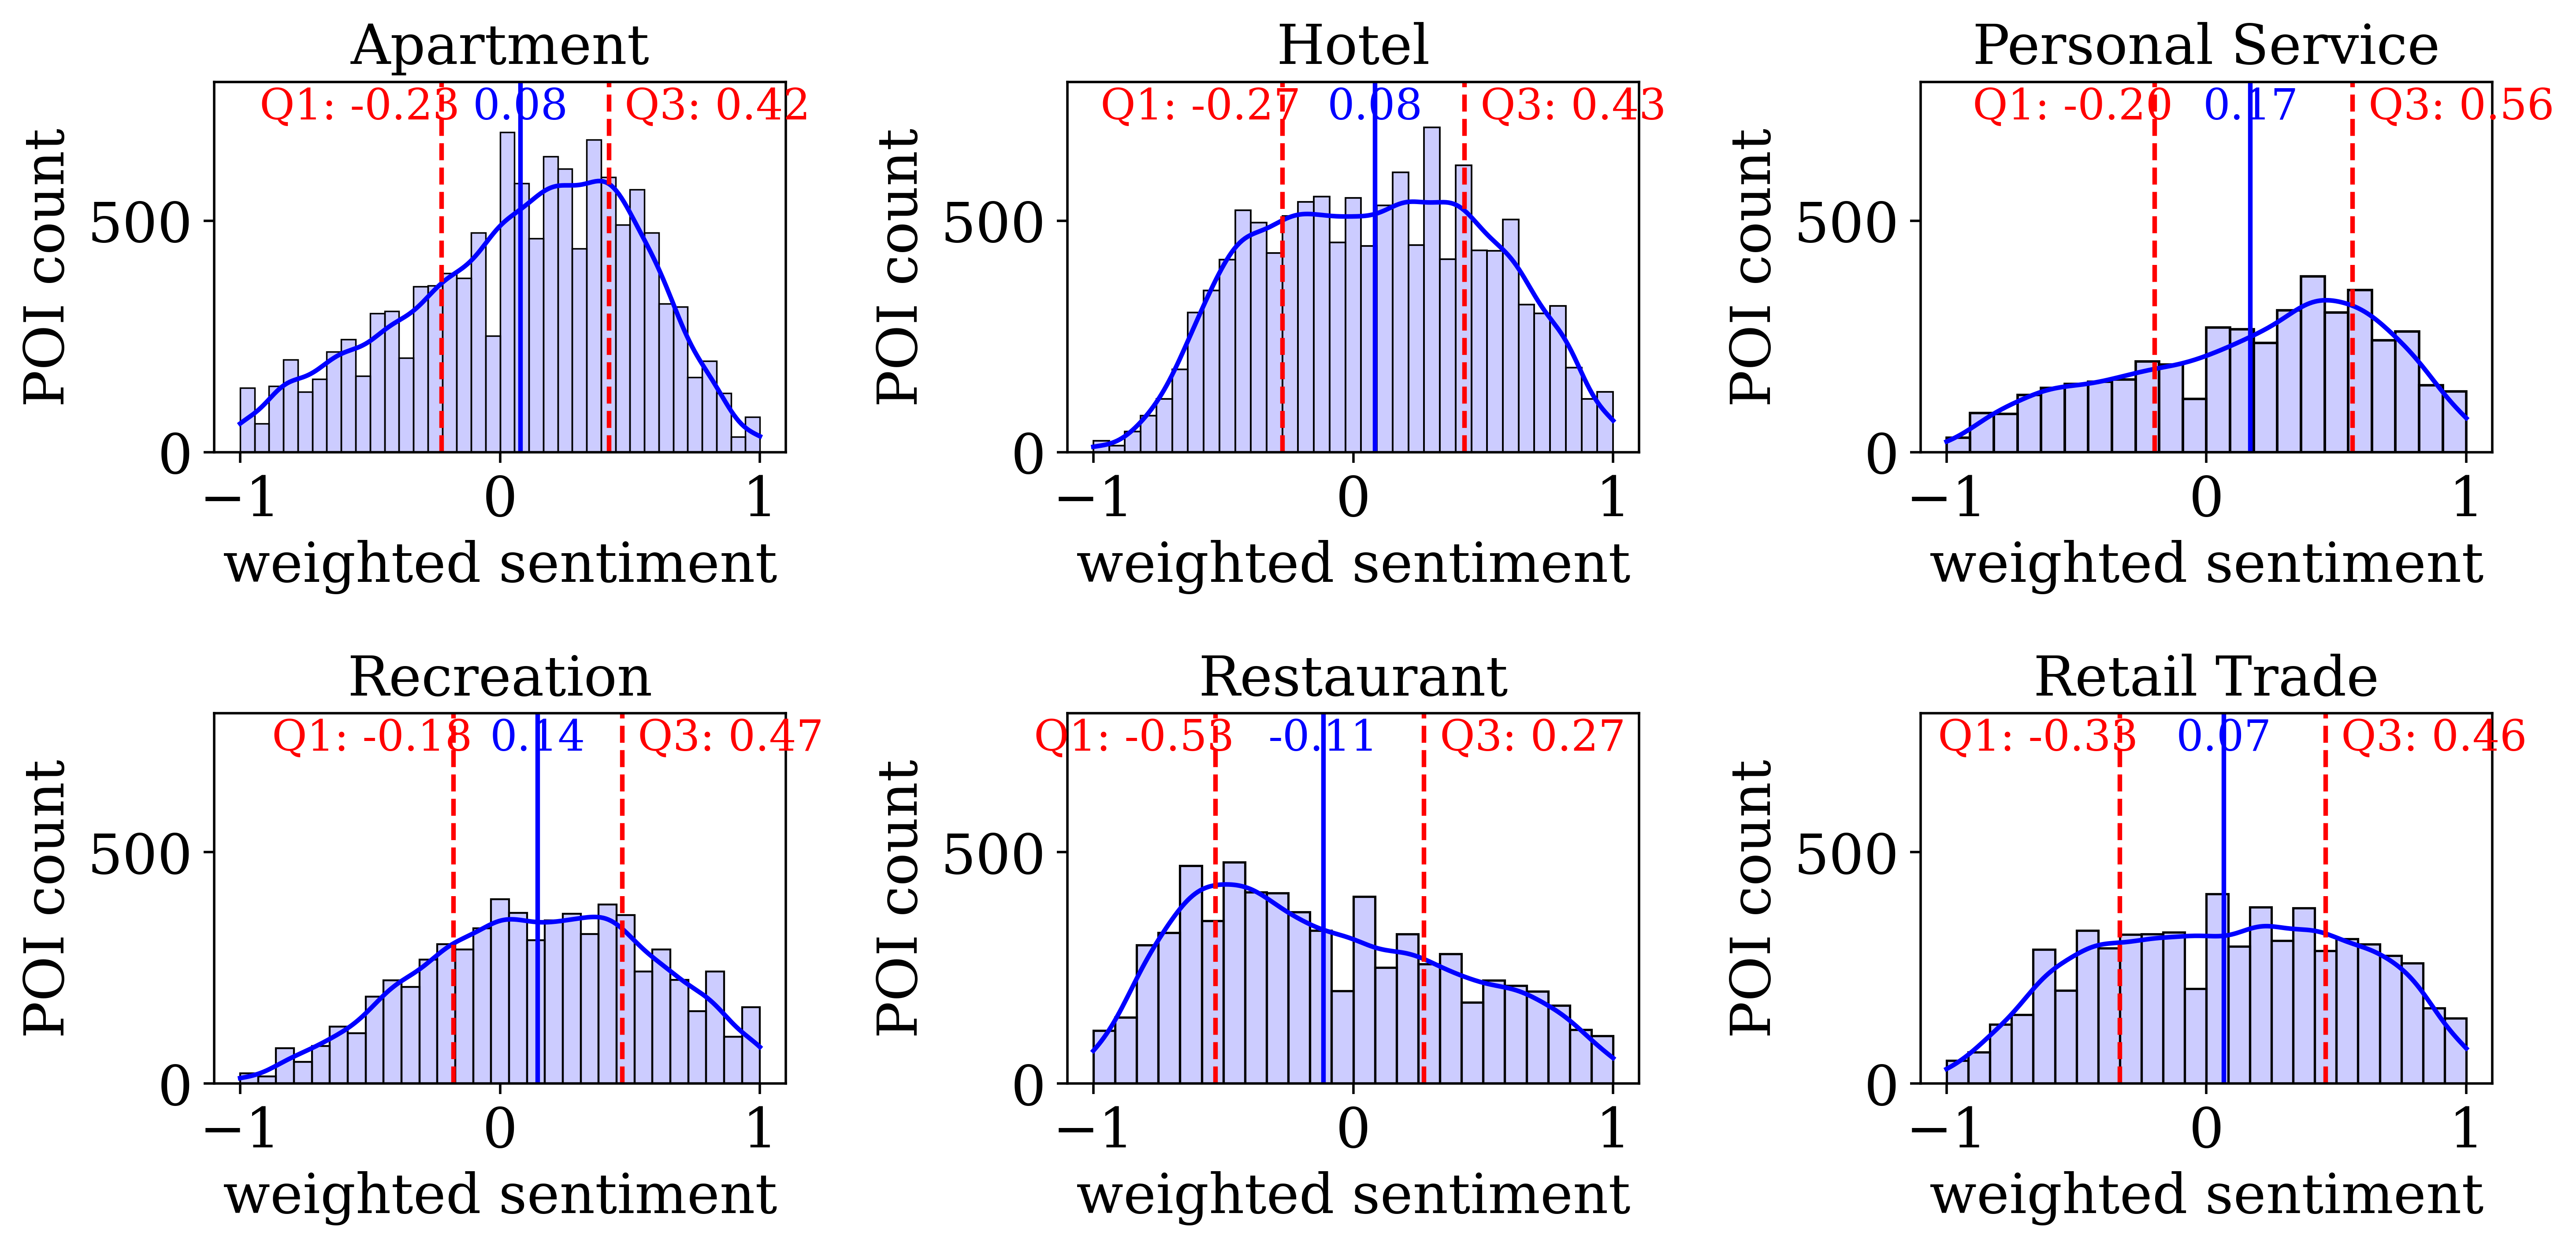

In [13]:
#categories = df['categories'].unique()
#categories = sorted(categories)

categories = ['Apartment', 'Hotel', 'Personal Service', 'Recreation', 'Restaurant', 'Retail Trade']

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12, 6))

for i, category in enumerate(categories):
    row = i // 3
    col = i % 3
    sns.histplot(data=df[df['categories'] == category], x='avg_parking_sentiment', 
                 kde=True, color='blue', ax=axs[row, col], alpha=0.2)

    Q1 = df[df['categories'] == category]['avg_parking_sentiment'].quantile(0.25)
    Q3 = df[df['categories'] == category]['avg_parking_sentiment'].quantile(0.75)
    mean = df[df['categories'] == category]['avg_parking_sentiment'].mean()

    axs[row, col].axvline(x=Q1, color='red', linestyle='--')
    axs[row, col].axvline(x=Q3, color='red', linestyle='--')
    axs[row, col].axvline(x=mean, color='blue', linestyle='-')

    axs[row, col].text(Q1-0.7, 720, f'Q1: {Q1:.2f}', color='red', fontsize=14)
    axs[row, col].text(mean, 720, f'{mean:.2f}', color='blue', fontsize=14, ha='center')
    axs[row, col].text(Q3+0.06, 720, f'Q3: {Q3:.2f}', color='red', fontsize=14)

    axs[row, col].set_xlabel('weighted sentiment')
    axs[row, col].set_ylabel('POI count')
    axs[row, col].set_ylim(0, 800)
    axs[row, col].set_title(f'{category}')

plt.tight_layout()
plt.show()

In [14]:
def wilcoxon_test(x, y):
    """
    Perform the Wilcoxon rank-sum test between two groups of data and return the p-value.
    """
    statistic, p_value = ranksums(x, y)
    return p_value

def pairwise_wilcoxon_test(df, categories):
    """
    Perform the pairwise Wilcoxon rank-sum test between all pairs of categories and return a matrix of p-values.
    """
    p_values = np.full((len(categories), len(categories)), np.nan)

    for i, category_i in enumerate(categories):
        for j, category_j in enumerate(categories):
            x = df[df['categories'] == category_i]['avg_parking_sentiment']
            y = df[df['categories'] == category_j]['avg_parking_sentiment']
            p_values[i, j] = wilcoxon_test(x, y)
                
    #p_values += p_values.T
    return p_values

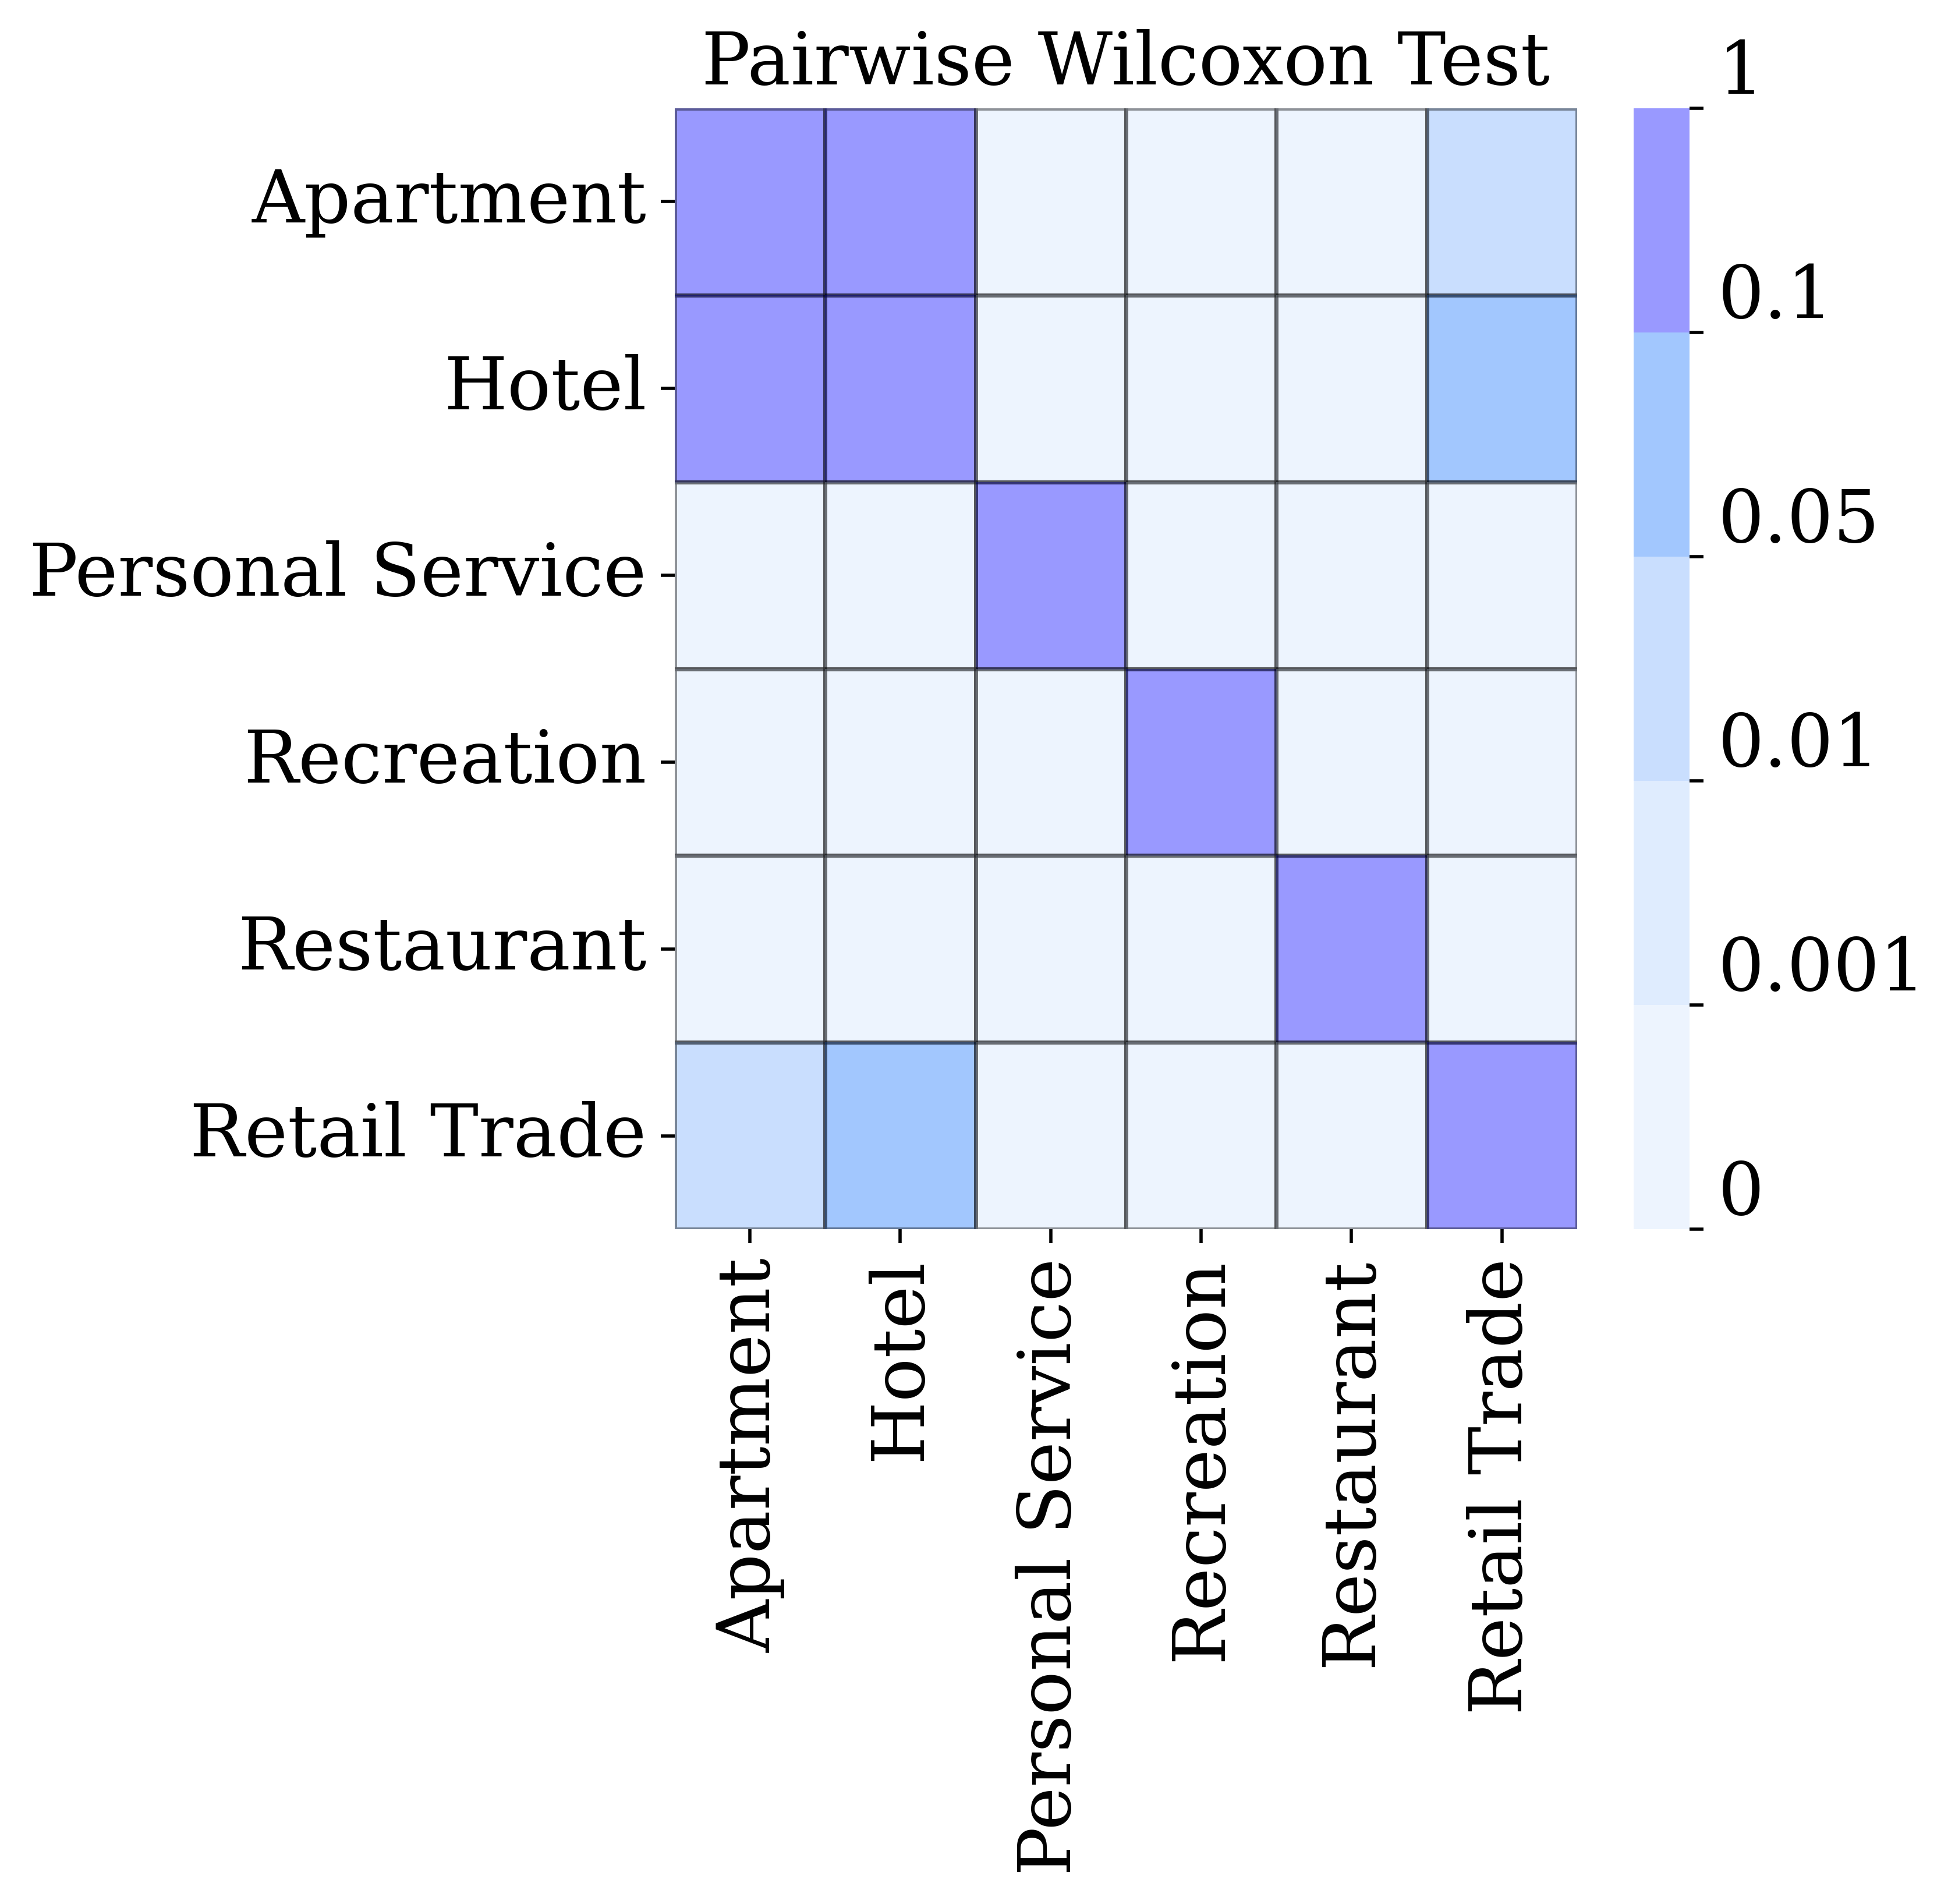

In [15]:
plt.figure(figsize=(5, 5))
p_values = pairwise_wilcoxon_test(df, categories)
bins = np.array([0, 0.001, 0.01, 0.05, 0.1, 1])
p_values_binned = np.digitize(p_values, bins, right=True)

index_to_value = {1: 0, 2: 0.001, 3: 0.01, 4: 0.05, 5: 0.1, 6: 1}
p_values_mapping = np.array([[index_to_value[j] for j in i] for i in p_values_binned])

blues = ['#d2e4fe', '#b1d0fe', '#78aefe', '#1773fe', 'blue']
cmap = mcolors.ListedColormap(blues)

norm = mcolors.BoundaryNorm(bins, cmap.N)
sns.heatmap(p_values_mapping, xticklabels=categories, yticklabels=categories, annot=False, 
            fmt='.0f', cmap=cmap, norm=norm, linecolor='black', linewidth=1, vmin=0.1, vmax=0.4, alpha=0.4)

cbar = plt.gca().collections[0].colorbar
cbar.set_ticks(bins)
cbar.set_ticklabels(['0', '0.001', '0.01', '0.05', '0.1', '1'])
cbar.ax.set_yticklabels(['0', '0.001', '0.01', '0.05', '0.1', '1'], ha='left', va='bottom', rotation=0, y=[-0.05, 0.05, 0.15, 0.25, 0.35, 0.5])

plt.title('Pairwise Wilcoxon Test')
plt.show()